In [17]:
import os.path as path
import numpy as np
import Corrfunc
from Corrfunc.theory import wp
from Corrfunc.theory.DDrppi import DDrppi
import fitsio
import matplotlib.pyplot as plt
import import_ipynb
from functions import create_data, generate_results, plot_results, wp_pairs_cross

galaxies = "/users/smritir/corrfunc_research/gals.fit"
halos = "/projects/hywu/cluster_sims/cluster_finding/data/flamingo/output_L1000N3600/HYDRO_FIDUCIAL/z0.3/host_halos_0072_HBT_M200m_1e+11.fit"


# All wp Calculations with 20 bins

In [18]:
g_x, g_y, g_z = create_data(galaxies)
h_x, h_y, h_z = create_data(halos)
h_x13, h_y13, h_z13 = create_data(halos, range = True, var = 'M200m', min = 10**13)
h_x14, h_y14, h_z14 = create_data(halos, range = True, var = 'M200m', min = 10**14)


## Galaxy wp

In [19]:
galaxy_results = generate_results(g_x, g_y, g_z)

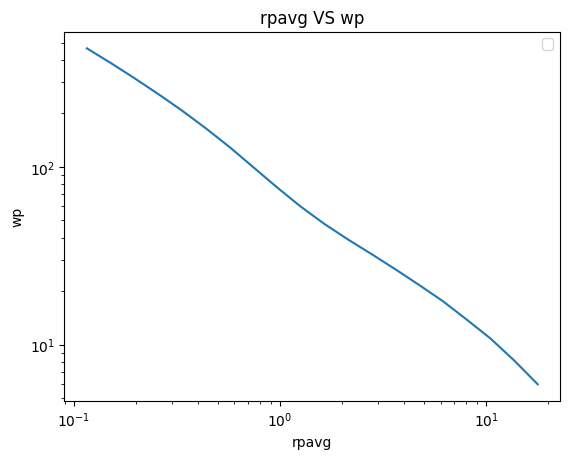

In [20]:
plot_results([galaxy_results[1]], [galaxy_results[0]])

## Halo wp: M200m > 10^14

In [21]:
halo_results14 = generate_results(h_x14, h_y14, h_z14)

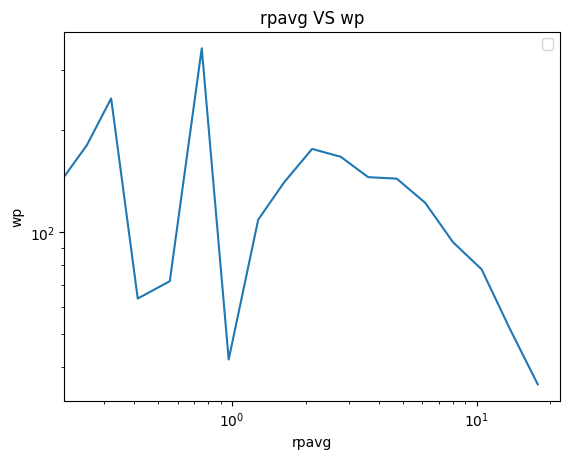

In [22]:
plot_results([halo_results14[1]], [halo_results14[0]])

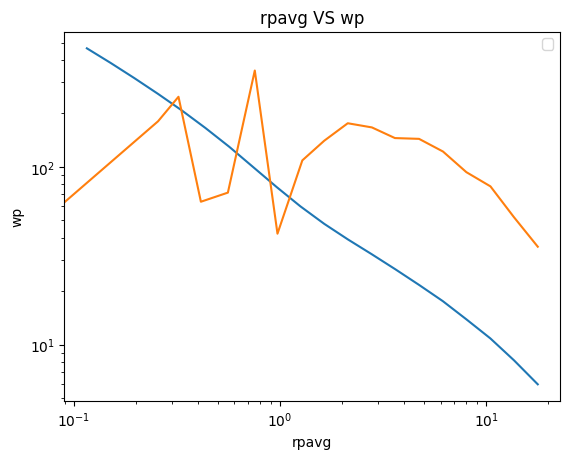

In [23]:
plot_results([galaxy_results[1], halo_results14[1]], [galaxy_results[0], halo_results14[0]] ) #"galaxy wp", "halo wp")

## Halo wp: M200m > 10^13

In [24]:
halo_results13 = generate_results(h_x13, h_y13, h_z13)

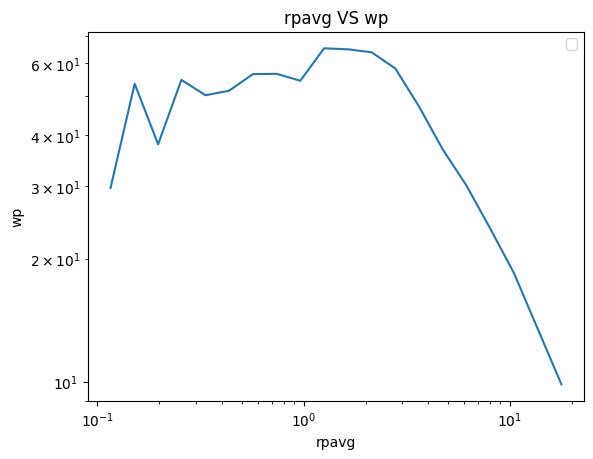

In [25]:
plot_results([halo_results13[1]], [halo_results13[0]])

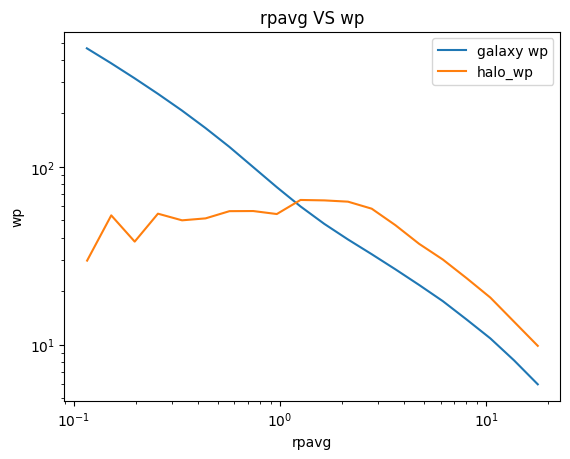

In [26]:
plot_results([galaxy_results[1], halo_results13[1]], [galaxy_results[0], halo_results13[0]], labels = ['galaxy wp', 'halo_wp'])

# All wp calculations with 18 bins

## Galaxy wp

In [27]:
galaxy_results = generate_results(g_x, g_y, g_z, nbins = 18)

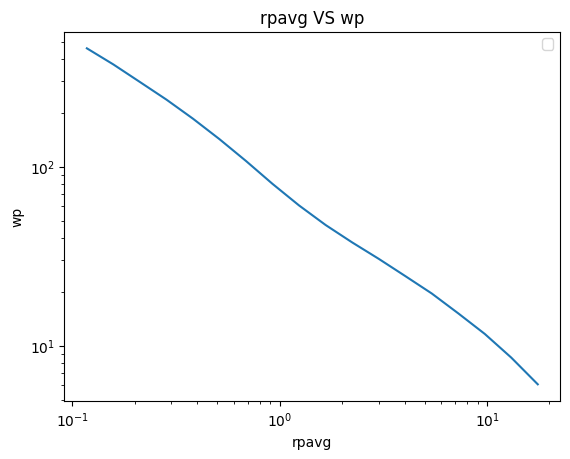

In [28]:
plot_results([galaxy_results[1]], [galaxy_results[0]])

## Halo wp: M200m > 10^14

In [29]:
halo_results14 = generate_results(h_x14, h_y14, h_z14, nbins = 18)

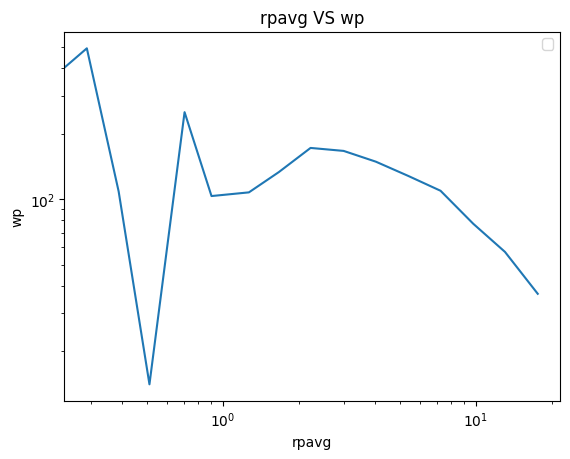

In [30]:
plot_results([halo_results14[1]], [halo_results14[0]])

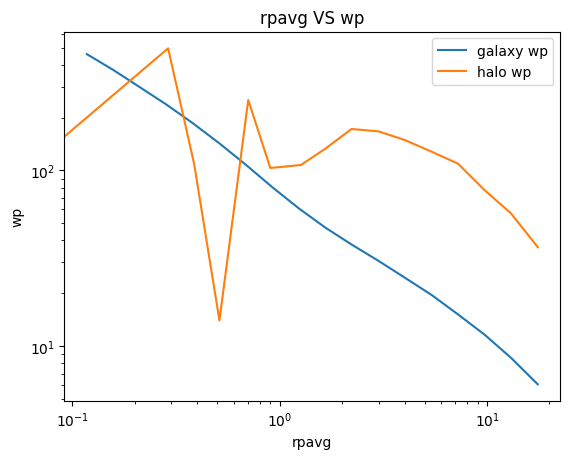

In [31]:
plot_results([galaxy_results[1], halo_results14[1]], [galaxy_results[0], halo_results14[0]], ["galaxy wp", "halo wp"])

## Halo wp: M200m > 10^13

In [32]:
halo_results13 = generate_results(h_x13, h_y13, h_z13, nbins = 18)

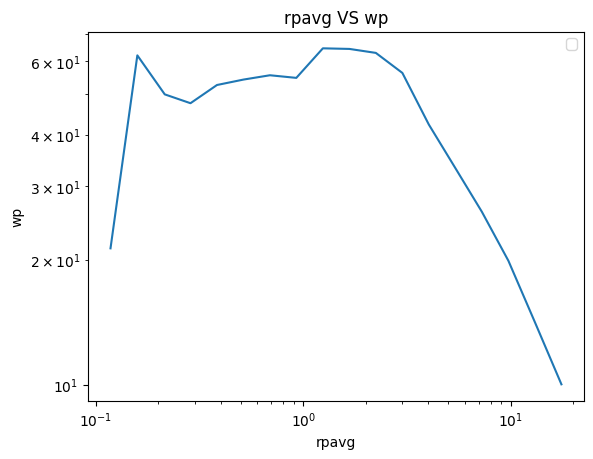

In [33]:
plot_results([halo_results13[1]], [halo_results13[0]])

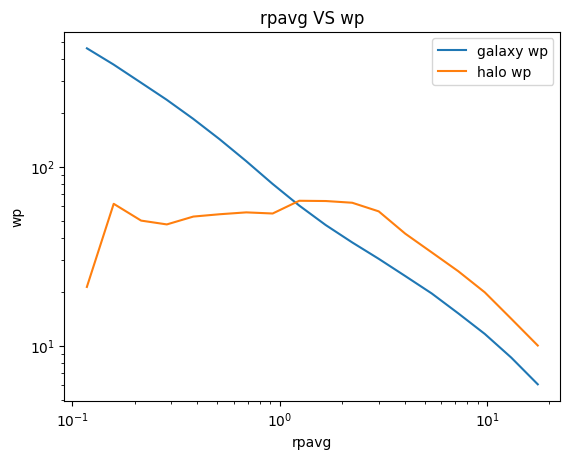

In [34]:
plot_results([galaxy_results[1], halo_results13[1]], [galaxy_results[0], halo_results13[0]], ['galaxy wp', 'halo wp'])

# All wp calculations with 16 bins

## Galaxy wp

In [35]:
galaxy_results = generate_results(g_x, g_y, g_z, nbins = 16)

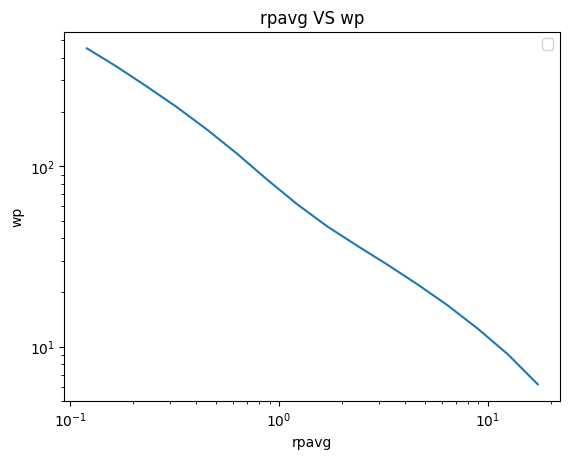

In [36]:
plot_results([galaxy_results[1]], [galaxy_results[0]])

## Halo wp: M200m > 10^14

In [37]:
halo_results14 = generate_results(h_x14, h_y14, h_z14, nbins = 16)

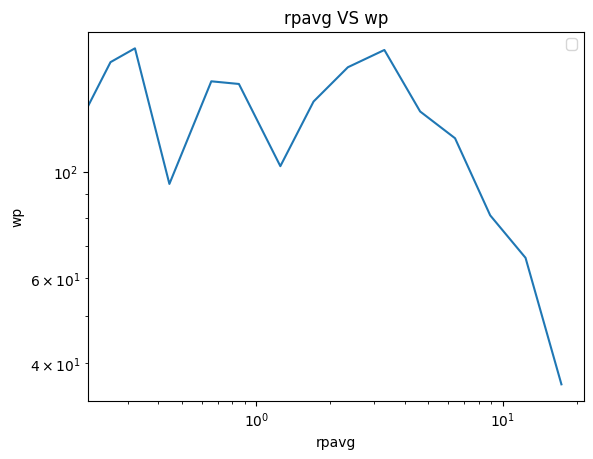

In [38]:
plot_results([halo_results14[1]], [halo_results14[0]])

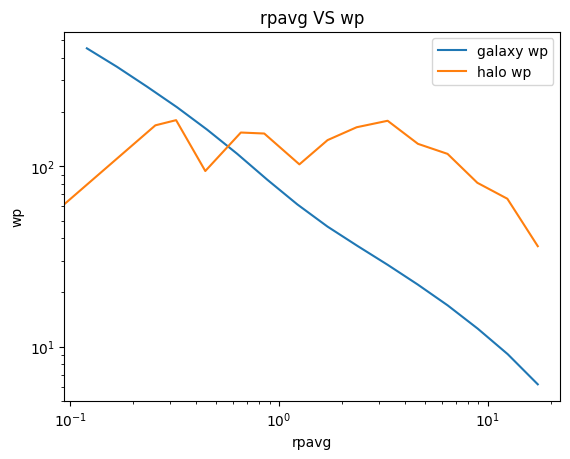

In [39]:
plot_results([galaxy_results[1], halo_results14[1]], [galaxy_results[0], halo_results14[0]], ["galaxy wp", "halo wp"])

## Halo wp: M200m > 10^13

In [40]:
halo_results13 = generate_results(h_x13, h_y13, h_z13, nbins = 16)

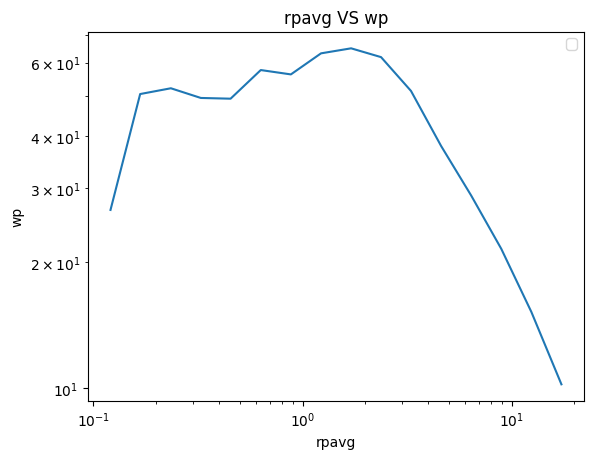

In [41]:
plot_results([halo_results13[1]], [halo_results13[0]])

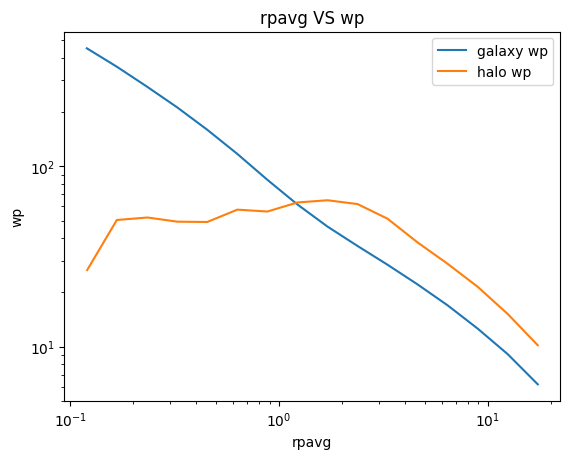

In [42]:
plot_results([galaxy_results[1], halo_results13[1]], [galaxy_results[0], halo_results13[0]], ['galaxy wp', 'halo wp'])

# Cross correlational wp calculations: Github function

## Cross correlation calculation with 20 bins

### M200m > 10^14

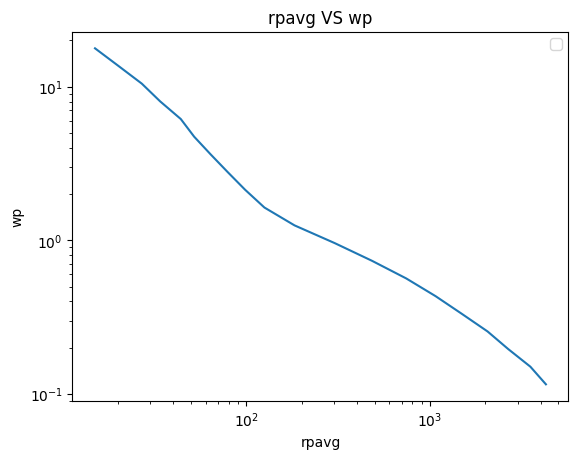

In [43]:
nbins = 20
rmin = 0.1
rmax = 20.0
# rpavg for M200m > 10^14
rbins = np.logspace(np.log10(0.1), np.log10(rmax), nbins + 1)
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x14, h_y14, h_z14, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results([cross_corr_wp], [cross_corr_rpavg])

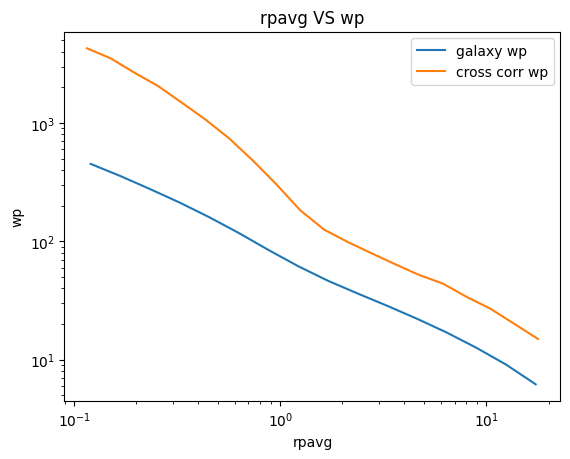

In [44]:
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

### M200m > 10^13

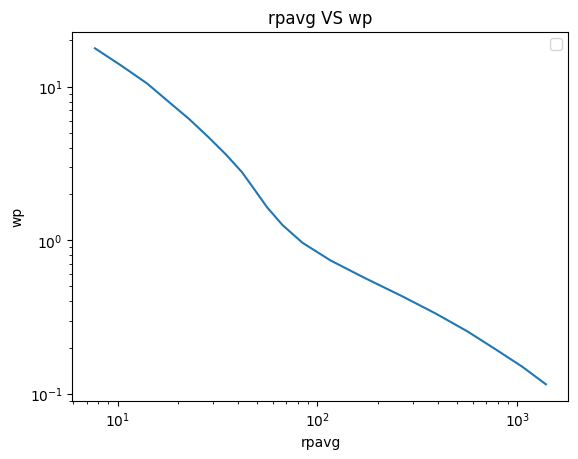

In [45]:
# rpavg for M200m > 10^13
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x13, h_y13, h_z13, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results([cross_corr_wp], [cross_corr_rpavg])

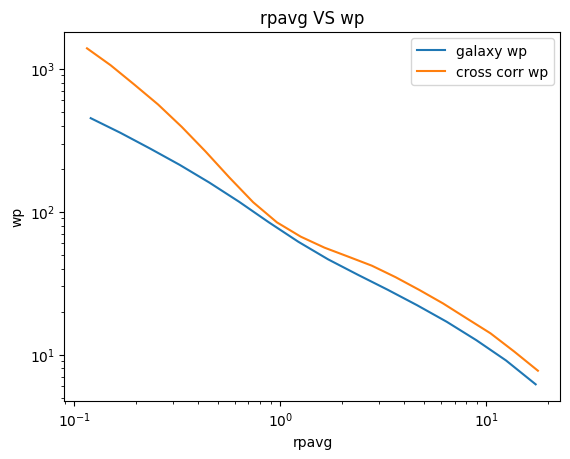

In [46]:
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

### M200m > 0

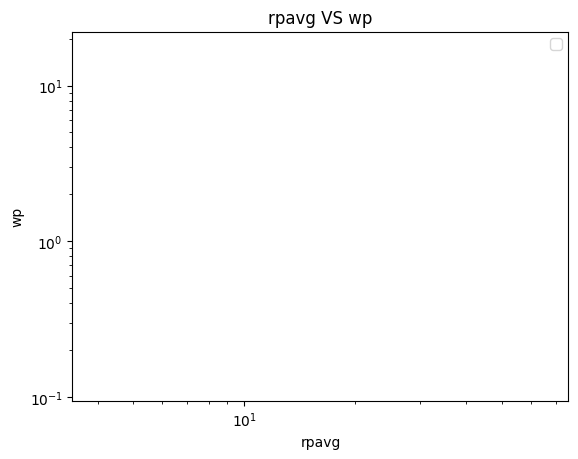

In [55]:
# rpavg for all M200m (M200m > 0)
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results(cross_corr_wp, cross_corr_rpavg)

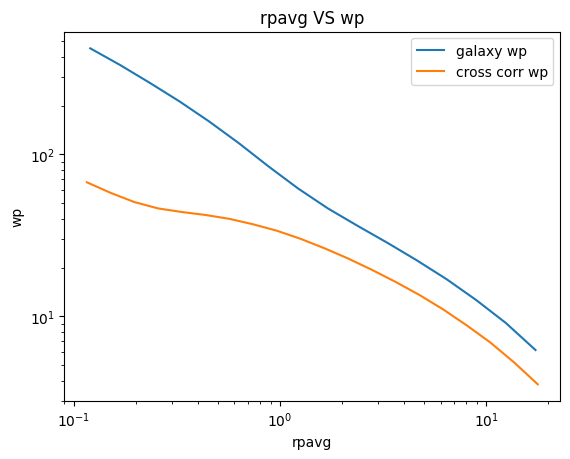

In [48]:
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

## Cross correlation calculation with 18 bins

### M200m > 10^14

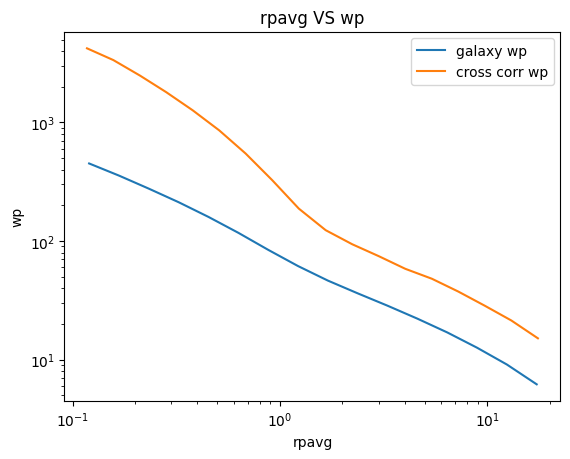

In [49]:
nbins = 18
rmin = 0.1
rmax = 20.0

rbins = np.logspace(np.log10(0.1), np.log10(rmax), nbins + 1)
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x14, h_y14, h_z14, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

### M200m > 10^13

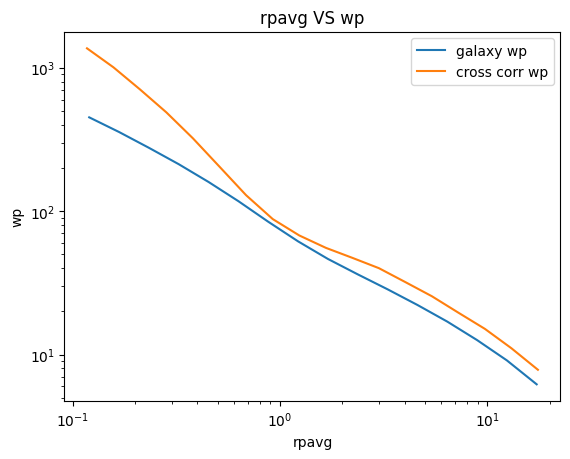

In [50]:
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x13, h_y13, h_z13, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

### M200m > 0

In [51]:
#cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize = max(g_x))
#plot_results(galaxy_results[0], galaxy_results[1], cross_corr_wp, cross_corr_rpavg, 'galaxy wp', 'cross corr wp')

## Cross correlation calculation with 16 bins

### M200m > 10^14

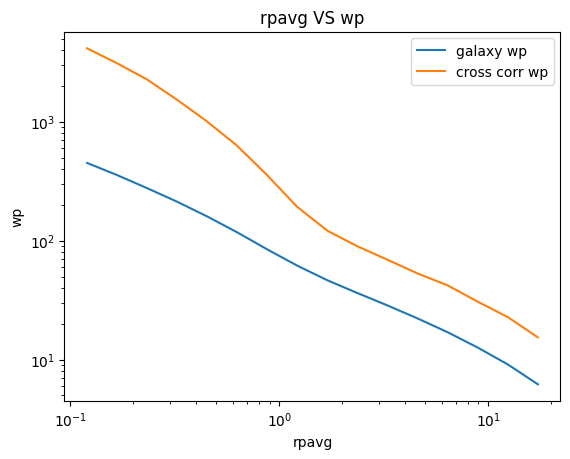

In [52]:
nbins = 16
rmin = 0.1
rmax = 20.0

rbins = np.logspace(np.log10(0.1), np.log10(rmax), nbins + 1)
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x14, h_y14, h_z14, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

### M200m > 10^13

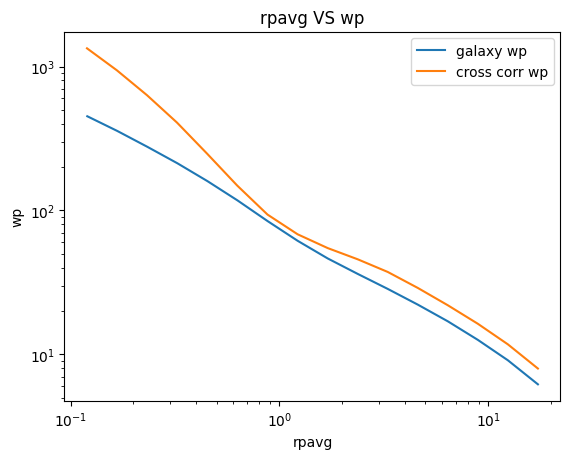

In [53]:
cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x13, h_y13, h_z13, pimax = 100, bins = rbins, boxsize = max(g_x))
plot_results([galaxy_results[1], cross_corr_rpavg], [galaxy_results[0], cross_corr_wp], ['galaxy wp', 'cross corr wp'])

### M200m > 0

In [54]:
#cross_corr_wp, cross_corr_rpavg = wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize = max(g_x))
#plot_results(galaxy_results[0], galaxy_results[1], cross_corr_wp, cross_corr_rpavg, 'galaxy wp', 'cross corr wp')